In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as ms

# Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\Sales Dataset\SalesAnalysis.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Analyse the given dataset completely and perform the following questions.
1. Convert the text based categorical columns to numeric columns
2. Convert the Order Date column into Day, Month, Year and Time columns separately
3. Create a new column and store the Price data as rounded off in integer format
4. Create a new column and store the PIN Codes from the Address column
5. Is there any pattern in the Order ID? If yes, find it.
6. Create a new column named City and store the city names from the Address column
7. Group Product column into different categories such as Phones, Accessories, etc according to the data available.
8. Create 12 separate date ordered dataframes for every month.

### Cleaning Data 

In [4]:
df.duplicated().any() # here we Find the duplicate data and than drop them

True

In [5]:
df.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
df.dropna(inplace = True) # here we Find the null data and than drop them

In [ ]:
df.info()

In [7]:
df['Price Each'].unique() # here we found out that rows contain data with their  column name 

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [8]:
df[df['Price Each']=='Price Each']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
df.drop(df[df['Price Each']=='Price Each'].index, inplace=True) # Dropping rows which data contains columns name as data

### 1. Convert the text based categorical columns to numeric columns

In [10]:
df['Order ID'] =   pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ MB


### 2. Convert the Order Date column into Day, Month, Year and Time columns separately

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
# here we are using  errors='coerce' because it will neglact error and pass

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['day'] = df['Order Date'].dt.day
df['time'] = df['Order Date'].dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00


### 3. Create a new column and store the Price data as rounded off in integer format

In [12]:
def round1(x):
    if type(x)== float :
        return int(round(x))    # the data whoes type is float is getting changed to integer by rounding off
    else:
        return x
df['Price'] = df['Price Each'].apply(round1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12


### 4. Create a new column and store the PIN Codes from the Address column

In [13]:
df['Pincode'] = df['Purchase Address'].apply(lambda x: x.split(',')[2][3:])
df['Pincode'].astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001


### 5. Is there any pattern in the Order ID? If yes, find it.

There is none pattern in the Order ID


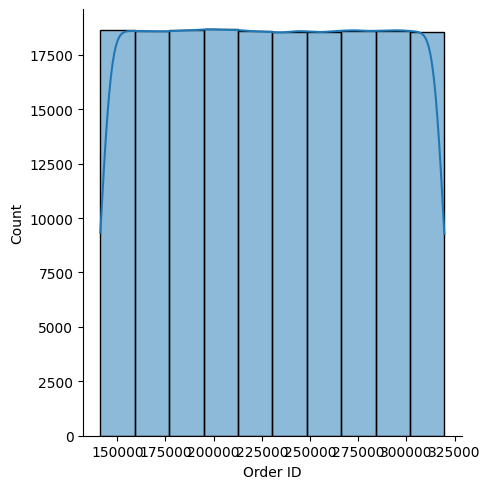

In [14]:
sns.displot(x = 'Order ID', data = df, bins = 10, kde = True)
print('There is none pattern in the Order ID')

### 6. Create a new column named City and store the city names from the Address column

In [15]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles


### 7. Group Product column into different categories such as Phones, Accessories, etc according to the data  available.

In [16]:
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [17]:
df['Product'].head(5)

0          USB-C Charging Cable
2    Bose SoundSport Headphones
3                  Google Phone
4              Wired Headphones
5              Wired Headphones
Name: Product, dtype: object

In [18]:
def Categories(x):
    a = ['Cable','Batteries']
    b = 'Phone'
    c = 'Monitor'
    d = 'Laptop'
    e = 'Headphones'
    for i in a:
        if i in x:
            return 'Accessories'
    if b in x:
        return 'Phones'
    if c in x:
        return 'Monitor'
    if d in x:
        return 'Laptops'
    if e in x:
        return 'Headphones'
    else:
        return 'Others'
df['Categories'] = df['Product'].apply(Categories)
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories
151552,292587,Apple Airpods Headphones,1,150.00,2019-11-01 09:55:00,"934 Elm St, Boston, MA 02215",2019,11,1,09:55:00,150,02215,Boston,Headphones
80524,226023,AA Batteries (4-pack),2,3.84,2019-07-07 14:30:00,"341 7th St, Portland, OR 97035",2019,7,7,14:30:00,4,97035,Portland,Accessories
120816,194401,Apple Airpods Headphones,1,150.00,2019-05-22 09:47:00,"475 9th St, Los Angeles, CA 90001",2019,5,22,09:47:00,150,90001,Los Angeles,Headphones
140273,281812,AA Batteries (4-pack),1,3.84,2019-11-07 19:50:00,"312 Cedar St, Austin, TX 73301",2019,11,7,19:50:00,4,73301,Austin,Accessories
179033,251870,Apple Airpods Headphones,1,150.00,2019-09-03 16:19:00,"649 Johnson St, San Francisco, CA 94016",2019,9,3,16:19:00,150,94016,San Francisco,Headphones


In [19]:
# df['Category'] = 'Other'

# # Assigning category to products containing 'phone', 'accessories','headphone' and other keyword
# df.loc[df['Product'].str.contains('phone', case=False), 'Category'] = 'Phones'

# df.loc[df['Product'].str.contains('Headphones', case=False), 'Category'] = 'Headphones'

# df.loc[df['Product'].str.contains('accessory|case', case=False), 'Category'] = 'Accessories'

# df

### 8. Create 12 separate date ordered dataframes for every month.

In [20]:
monthly_datframes={}
for month in range(1,13):
    month_df = df[(df['month'] == month)].copy()
    monthly_datframes[month]=month_df
    #print(monthly_datframes)
jan_df=monthly_datframes[1]
feb_df=monthly_datframes[2]
march_df=monthly_datframes[3]
april_df=monthly_datframes[4]
may_df=monthly_datframes[5]
june_df=monthly_datframes[6]
july_df=monthly_datframes[7]
aug_df=monthly_datframes[8]
sep_df=monthly_datframes[9]
oct_df=monthly_datframes[10]
nov_df=monthly_datframes[11]
dec_df=monthly_datframes[12]

In [21]:
df['sales']= df['Quantity Ordered']*df['Price']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas,Accessories,24
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones,100
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones,600
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones,12


### Analyse the given dataset completely and answer the following questions.
1. What was the best month for sales? How much was earned that month? Explain via graph/chart
2. What city sold the most product?
3. What time should we display advertisements to maximize likelihood of customer's buying product?
4. Which product was sold the least as per your categories and what might be the reason behind that. Explain your analysis.
5. Which product is most likely to be sold more during winter season, summer season and rainy season? Explain the possible reason behind the High-Volume Sale
6. Which phone is sold most during the month of March?
7. Which headphones are the most expensive?
8. Check if the price of any product is changing in different months. If yes, explain the possible reason behind the price change
9. People prefer which product more in earphones, wired or wireless?
10. Which product in every category in more likely to be ordered in bulk?

## **1. What was the best month for sales? How much was earned that month? Explain via graph/chart**

In [22]:
sales_months=df.groupby('month').sum(numeric_only = True)
sales_months.drop(columns=sales_months[['year','day','Price Each','Price']])

,Order ID,Quantity Ordered,sales
month,,,
1,1421630798,10903,1822655
2,1871052592,13449,2202517
3,2564810956,17005,2807722
4,3387347100,20558,3391444
5,3345871523,18667,3153280
6,2932976072,15253,2578373
7,3284139576,16072,2648362
8,2899373917,13448,2244966
9,2948726831,13109,2098053


best month for sales is 12th Month


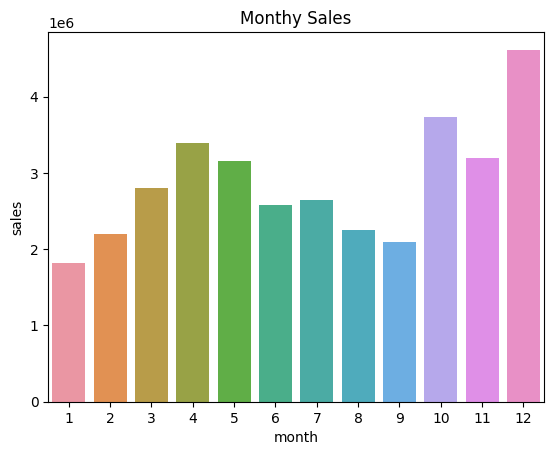

In [23]:
sns.barplot(x= sales_months.index , y=sales_months['sales'], data = sales_months)
plt.title('Monthy Sales')

y1 = sales_months.loc[sales_months["sales"]==sales_months['sales'].max()].index.tolist()[0]
print(f"best month for sales is {y1}th Month")

### 2. What city sold the most product?

In [24]:
City_product =df.groupby('City').sum(numeric_only = True)
City_product.drop(columns=sales_months[['year','day','Price Each','Price']])

,Order ID,Quantity Ordered,month,sales
City,,,,
Atlanta,3423838407,16602,104794,2796112
Austin,2280982185,11153,69829,1819987
Boston,4598265261,22528,141112,3662478
Dallas,3415643578,16730,104620,2768598
Los Angeles,6811084693,33289,208325,5453807
New York City,5736333884,27932,175741,4665339
Portland,2868861092,14053,87765,2321019
San Francisco,10304443952,50239,315520,8264049
Seattle,3406693974,16553,104941,2748361


The Most Product Seliing City is  San Francisco


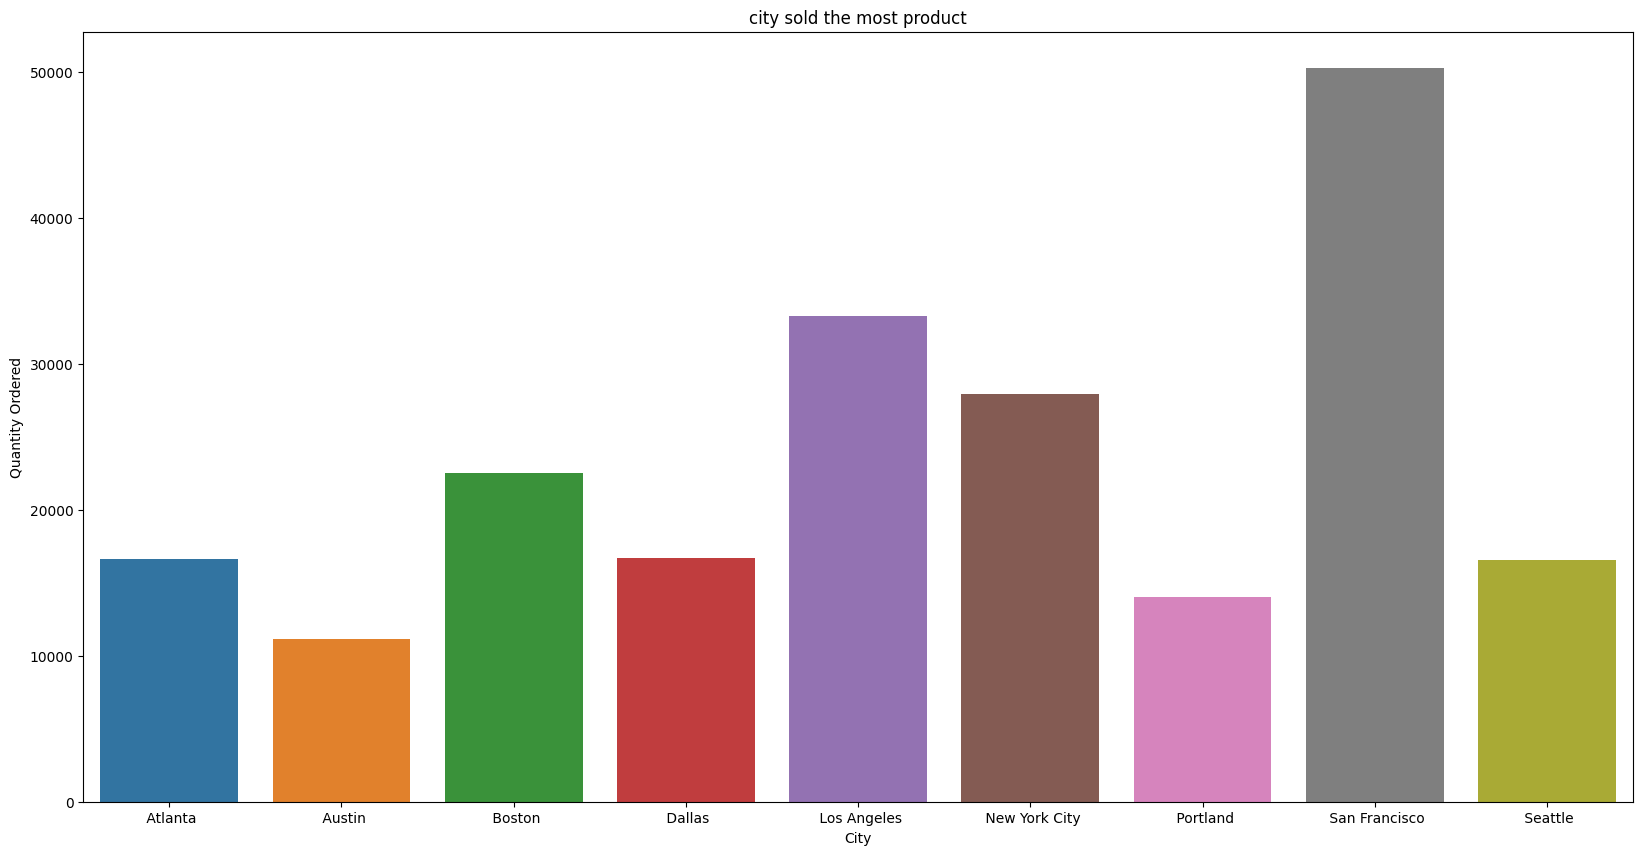

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x= City_product.index , y= City_product['Quantity Ordered'], data = City_product)
plt.title('city sold the most product')
y1 = City_product.loc[City_product["Quantity Ordered"]==City_product['Quantity Ordered'].max()].index.tolist()[0]
print(f"The Most Product Seliing City is {y1}")

### 3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [26]:
Best_time_buying = df.groupby('time').sum(numeric_only = True)
Best_time_buying = Best_time_buying.sort_values(by = 'Quantity Ordered', ascending = False)

print(f"we display advertisements {Best_time_buying.index.tolist()[0]} time to maximize likelihood of customer's buying product")

we display advertisements 11:58:00 time to maximize likelihood of customer's buying product


### 4. Which product was sold the least as per categories and what might be the reason behind that. Explain your analysis.

In [27]:
Least_sold_product = df.groupby('Product').sum(numeric_only = True)
Least_sold_product = Least_sold_product.sort_values(by = 'Quantity Ordered', ascending = True)
Least_sold_product.head(5)

,Order ID,Quantity Ordered,Price Each,year,month,day,Price,sales
Product,,,,,,,,
LG Dryer,146556268,646,387600.00,1304274,4383,10071,387600,387600
LG Washing Machine,150718688,666,399600.00,1344654,4523,10323,399600,399600
Vareebadd Phone,472532509,2068,826000.00,4169236,14309,32733,826000,827200
20in Monitor,950889651,4129,451068.99,8279921,29336,64237,451110,454190
ThinkPad Laptop,948793172,4130,4127958.72,8334434,28950,64351,4128000,4130000


In [28]:
print(f"The least buying product is {Least_sold_product.index.tolist()[0]} Becuase It is Available in Local Shops.")

The least buying product is LG Dryer Becuase It is Available in Local Shops.


### 5. Which product is most likely to be sold more during winter season, summer season and rainy season? Explain the possible reason behind the High-Volume Sale

In [29]:
def season(x):
    s = (6,7,8)
    w = (12,1,2)
    r = (9,10,11)
    if x in s:
        return 'Summer'
    elif x in w:
        return 'winter'
    elif x in r:
        return 'Rainny'
    else:
        return "other"
    
df['Seasons'] = df['month'].apply(season)
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories,sales,Seasons
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas,Accessories,24,other
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones,100,other
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones,600,other
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones,12,other
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones,12,other


In [30]:
summer = df[df.Seasons=='Summer']
summer_product = summer.groupby('Product').sum(numeric_only = True)
summer_product.sort_values(by='Quantity Ordered', ascending = False)

,Order ID,Quantity Ordered,Price Each,year,month,day,Price,sales
Product,,,,,,,,
AAA Batteries (4-pack),997139883,6548,13009.49,8784669,30346,68630,13053,19644
AA Batteries (4-pack),1020016170,5995,17111.04,8996664,31006,70920,17824,23980
USB-C Charging Cable,1041032482,4986,54324.70,9178374,31632,72335,54552,59832
Lightning Charging Cable,1057020337,4941,69009.20,9319704,32105,73546,69240,74115
Wired Headphones,907227087,4330,47516.37,8001297,27599,62550,47556,51960
Apple Airpods Headphones,770441308,3396,504750.00,6793935,23400,53393,504750,509400
Bose SoundSport Headphones,663461274,2924,289571.04,5847024,20171,46564,289600,292400
27in FHD Monitor,377413569,1665,247333.51,3329331,11467,25803,247350,249750
iPhone,336935329,1474,1031100.00,2973987,10217,23021,1031100,1031800


In [31]:
winter = df[df.Seasons=='winter']
winter_product = winter.groupby('Product').sum(numeric_only = True)
winter_product.sort_values(by='Quantity Ordered', ascending = False)

,Order ID,Quantity Ordered,Price Each,year,month,day,Price,sales
Product,,,,,,,,
AAA Batteries (4-pack),1235512911,7813,15655.64,10571487,37698,82725,15708,23439
AA Batteries (4-pack),1187823625,6883,19334.40,10165665,36242,79471,20140,27532
USB-C Charging Cable,1325424307,6191,67732.60,11443696,39962,89385,68016,74292
Lightning Charging Cable,1264560714,5741,80117.05,10819826,38577,83170,80385,86115
Wired Headphones,1114811205,5113,56772.65,9559966,33924,74279,56820,61356
Apple Airpods Headphones,909670851,3906,581850.00,7831705,27505,61497,581850,585900
Bose SoundSport Headphones,782648589,3327,329667.03,6656646,24005,51651,329700,332700
27in FHD Monitor,430521043,1859,277631.49,3737172,12871,28970,277650,278850
iPhone,402927134,1726,1208200.00,3484796,12131,26512,1208200,1208200


In [32]:
Rainny = df[df.Seasons=='Rainny']
Rainny_product = Rainny.groupby('Product').sum(numeric_only = True)
Rainny_product.sort_values(by='Quantity Ordered', ascending = False)

,Order ID,Quantity Ordered,Price Each,year,month,day,Price,sales
Product,,,,,,,,
AAA Batteries (4-pack),1502505530,8311,16516.76,11152956,55961,86060,16572,24933
AA Batteries (4-pack),1502822439,7336,21223.68,11159013,55926,86914,22108,29344
USB-C Charging Cable,1617976301,6517,71198.10,12029202,60188,94476,71496,78204
Lightning Charging Cable,1577199273,6214,86665.15,11704143,58689,91186,86955,93210
Wired Headphones,1373433895,5509,60573.48,10199988,51129,80664,60624,66108
Apple Airpods Headphones,1123210669,4153,619350.00,8336451,41827,64144,619350,622950
Bose SoundSport Headphones,952139434,3545,350164.98,7070538,35434,55290,350200,354500
27in FHD Monitor,538859335,1993,296980.20,3997620,20030,31232,297000,298950
iPhone,483569877,1778,1242500.00,3583725,18018,28457,1242500,1244600


**After Analysis we Find that AAA Batteries (4-pack) is the Product which most sold in winter, summer, rainny seasons. Because it get discharge in short time and most of  the product used in House works uses AAA Batteries And the product they are selling also uses AAA Batteries**

### 6. Which phone is sold most during the month of March?

In [33]:
phones = df[(df['Categories']=='Phones')&(df['month']==3)]
phones = phones.sort_values(by= 'Quantity Ordered', ascending = False)
phones.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories,sales,Seasons
113939,170287,iPhone,2,700.0,2019-03-30 14:33:00,"408 Madison St, Portland, OR 97035",2019,3,30,14:33:00,700,97035,Portland,Phones,1400,other
105263,162009,iPhone,1,700.0,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",2019,3,28,20:59:00,700,73301,Austin,Phones,700,other
115066,171375,Google Phone,1,600.0,2019-03-19 21:14:00,"598 Lakeview St, San Francisco, CA 94016",2019,3,19,21:14:00,600,94016,San Francisco,Phones,600,other
115117,171423,iPhone,1,700.0,2019-03-15 15:12:00,"80 Cedar St, New York City, NY 10001",2019,3,15,15:12:00,700,10001,New York City,Phones,700,other
115108,171415,iPhone,1,700.0,2019-03-09 14:57:00,"454 Spruce St, New York City, NY 10001",2019,3,9,14:57:00,700,10001,New York City,Phones,700,other


### 7. Which headphones are the most expensive?

In [34]:
Headphones = df[(df['Categories']=='Headphones')]
Headphones = Headphones.sort_values(by= 'sales', ascending = False)
Headphones.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories,sales,Seasons
45353,309951,Apple Airpods Headphones,3,150.0,2019-12-31 21:37:00,"446 Walnut St, Boston, MA 02215",2019,12,31,21:37:00,150,02215,Boston,Headphones,450,winter
1377,177866,Apple Airpods Headphones,2,150.0,2019-04-06 17:11:00,"855 Main St, Los Angeles, CA 90001",2019,4,6,17:11:00,150,90001,Los Angeles,Headphones,300,other
101251,219077,Apple Airpods Headphones,2,150.0,2019-06-20 10:53:00,"202 West St, Seattle, WA 98101",2019,6,20,10:53:00,150,98101,Seattle,Headphones,300,Summer
105831,162544,Apple Airpods Headphones,2,150.0,2019-03-10 12:40:00,"190 Maple St, New York City, NY 10001",2019,3,10,12:40:00,150,10001,New York City,Headphones,300,other
51602,315926,Apple Airpods Headphones,2,150.0,2019-12-12 18:18:00,"623 North St, New York City, NY 10001",2019,12,12,18:18:00,150,10001,New York City,Headphones,300,winter


### 8. Check if the price of any product is changing in different months. If yes, explain the possible reason behind the price change

In [35]:
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [36]:
l = df.Product.unique().tolist()
for i in l:
#     we made list of all 19 products and found out their unique values
    x = df[(df['Product']==i)]['Price'].unique()
    print(x)
    
print('\nSince there is not more than 1 unique value for all the product. Price of Products have not changed in diffrent months')

[12]
[100]
[600]
[12]
[1700]
[15]
[390]
[4]
[150]
[3]
[700]
[300]
[150]
[110]
[600]
[1000]
[400]
[600]
[380]

Since there is not more than 1 unique value for all the product. Price of Products have not changed in diffrent months


In [37]:
l = df.Product.unique().tolist()
z=[jan_df,feb_df,march_df,april_df,may_df,june_df,july_df, aug_df,sep_df,oct_df,nov_df,dec_df]
for i in l:
    for u in z:
        # we made list of all 19 products and found out their unique values
        x = u[(u['Product']==i)]['Price'].unique()
        print(x,end='')
    print('\n')        
print('\nSince there is not more than 1 unique value for all the product. Price of Products have not changed in diffrent months')

[12][12][12][12][12][12][12][12][12][12][12][12]

[100][100][100][100][100][100][100][100][100][100][100][100]

[600][600][600][600][600][600][600][600][600][600][600][600]

[12][12][12][12][12][12][12][12][12][12][12][12]

[1700][1700][1700][1700][1700][1700][1700][1700][1700][1700][1700][1700]

[15][15][15][15][15][15][15][15][15][15][15][15]

[390][390][390][390][390][390][390][390][390][390][390][390]

[4][4][4][4][4][4][4][4][4][4][4][4]

[150][150][150][150][150][150][150][150][150][150][150][150]

[3][3][3][3][3][3][3][3][3][3][3][3]

[700][700][700][700][700][700][700][700][700][700][700][700]

[300][300][300][300][300][300][300][300][300][300][300][300]

[150][150][150][150][150][150][150][150][150][150][150][150]

[110][110][110][110][110][110][110][110][110][110][110][110]

[600][600][600][600][600][600][600][600][600][600][600][600]

[1000][1000][1000][1000][1000][1000][1000][1000][1000][1000][1000][1000]

[400][400][400][400][400][400][400][400][400][400][400][400]

[600][

### 9. People prefer which product more in earphones, wired or wireless?

In [38]:
df[(df['Categories']=='Headphones')]['Product'].unique()

array(['Bose SoundSport Headphones', 'Wired Headphones',
       'Apple Airpods Headphones'], dtype=object)

In [39]:
df2 = df[(df['Categories']=='Headphones')]
df2.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories,sales,Seasons
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones,100,other
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones,12,other
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones,12,other


In [40]:
def earphones(x):
    if 'Wired' in x:
        return 'wired'
    else:
        return 'wireless'

df2['Earnphones type'] = df2['Product'].apply(earphones)

C:\Users\Kunwa\AppData\Local\Temp\ipykernel_7652\3541891325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Earnphones type'] = df2['Product'].apply(earphones)


In [41]:
df2.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Price,Pincode,City,Categories,sales,Seasons,Earnphones type
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones,100,other,wireless
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones,12,other,wired
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones,12,other,wired


In [42]:
earphone_type = df2.groupby('Earnphones type').sum(numeric_only=True).drop(['year','month','day','Price Each','sales'],axis=1)
earphone_type_prefer = earphone_type.sort_values(by = 'Quantity Ordered',ascending = False)
earphone_type_prefer

,Order ID,Quantity Ordered,Price
Earnphones type,,,
wireless,6650616254,29118,3664850
wired,4350951550,20557,226584


In [43]:
print(f'Accoring to Analysis We Found the type of earphones people prefer is {earphone_type_prefer.index.tolist()[0]}')

Accoring to Analysis We Found the type of earphones people prefer is wireless


### 10. Which product in every category in more likely to be ordered in bulk?

In [44]:
l = df.Product.unique().tolist()
for i in l:
#     we made list of all 19 products and found out their unique values
    x = df[(df['Product']==i)]['Quantity Ordered'].unique()
    print(f'The ordered in bulk of {i}  is : {x[-1]}')

The ordered in bulk of USB-C Charging Cable  is : 5
The ordered in bulk of Bose SoundSport Headphones  is : 3
The ordered in bulk of Google Phone  is : 2
The ordered in bulk of Wired Headphones  is : 4
The ordered in bulk of Macbook Pro Laptop  is : 2
The ordered in bulk of Lightning Charging Cable  is : 4
The ordered in bulk of 27in 4K Gaming Monitor  is : 2
The ordered in bulk of AA Batteries (4-pack)  is : 7
The ordered in bulk of Apple Airpods Headphones  is : 3
The ordered in bulk of AAA Batteries (4-pack)  is : 9
The ordered in bulk of iPhone  is : 2
The ordered in bulk of Flatscreen TV  is : 2
The ordered in bulk of 27in FHD Monitor  is : 2
The ordered in bulk of 20in Monitor  is : 2
The ordered in bulk of LG Dryer  is : 1
The ordered in bulk of ThinkPad Laptop  is : 2
The ordered in bulk of Vareebadd Phone  is : 2
The ordered in bulk of LG Washing Machine  is : 1
The ordered in bulk of 34in Ultrawide Monitor  is : 2


# Completed